### Newton/Gradient descent

#### Ignoring first 2 singular values for rank 1 matrix

If matrix is rank 1, optimization that ignores first two largest singular values fails in most cases for any number of missing entries. But, sometimes from about **1 entry up to about 4 entries** could be missing and the matrix will be recovered successfully. I have been sampling matrices randomly, so this is probably not a tight bound. This shows that perhaps there are a class of matrices and a class of missing entries for which exact recovery is possible even if we ignore second largest singular value. The number of entries m required for exact recovery of nxn matrix is:

$$ m = C n^b$$

where

$$C = 0.9842 \pm 0.002051$$
$$b = 2.0040 \pm 0.0004884$$

Thus, m is about $m = 0.98 * n^2$. In total, there are $n^2$ entries, so roughly for many randomly sampled matrices, only 98% of entries are required to recover the original matrix even if we don't minimize second singular values explicitly.

#### Ignoring first 2 singular values for rank 2 matrix

In this case it seems that the number of required entries m is given by one of the two formulas:

$$m = C n^b \log(n) $$

where

$$C = 2.761 \pm 0.29190$$
$$b = 1.139 \pm 0.03172$$

#### Ignoring one singular value for rank 2 matrix

$$C = 3.161 \pm 0.3492$$
$$b = 1.111 \pm 0.03464$$

#### Ignoring one singular value for rank 1 matrix

The number of entries m required to recover nxn matrix is given by the formula

$$m = C n^b \log(n) $$

where

$$C = 1.719 \pm 0.25960$$
$$b = 1.279 \pm 0.04521$$

#### Canonical nuclear norm minimization for rank 2 matrices

$$m = C n^b \log(n) $$

where

$$C = 3.893 \pm 0.4991$$
$$b = 1.065 \pm 0.03835$$

#### Canonical nuclear norm minimization for rank 1 matrices

$$m = C n^b \log(n) $$

where

$$C = 3.414 \pm 0.4640$$
$$b = 1.069 \pm 0.04098$$

#### Number of dimensions of search space

Roughly, number of dimensions of search space also follows

$$m = C n^b \log(n) $$

where

$$C = 0.7611 \pm 0.035150$$
$$b = 1.0270 \pm 0.009982$$

These results were gained by PCA


In [3]:
import matplotlib.pyplot as plt

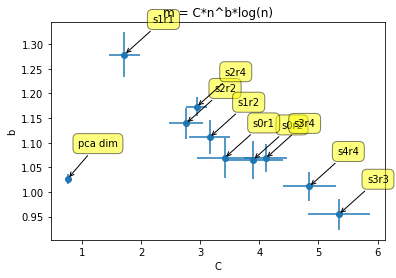

In [8]:
fig, ax = plt.subplots()

C  = [2.761, 3.161, 1.719, 3.893, 3.414, 0.7611, 4.845, 5.346, 2.941, 4.106]
b  = [1.139, 1.111, 1.279, 1.065, 1.069, 1.0270, 1.011, 0.9546, 1.173, 1.068]
Ce = [0.29190, 0.3492, 0.25960, 0.4991, 0.4640, 0.035150, 0.4444, 0.5288, 0.1806, 0.3662]
be = [0.03172, 0.03464, 0.04521, 0.03835, 0.04098, 0.009982, 0.02923, 0.03178, 0.01958, 0.02837]

labels=['s2r2', 's1r2', 's1r1', 's0r2', 's0r1', 'pca dim', 's4r4', 's3r3', 's2r4', 's3r4']

ax.errorbar(C, b, xerr=Ce, yerr=be, fmt='o')
ax.set_xlabel('C')
ax.set_ylabel('b')
ax.set_title('m = C*n^b*log(n)')

for label, x, y in zip(labels, C, b):
    ax.annotate(
        label,
        xy=(x, y), xytext=(50, 30),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.savefig('summary.png')

Note: For high rank matrices, convergence takes a lot of time and the graph is very linear, so fitting is hard. Hence, expect low accuracy.

It could also be that there are in fact two types of matrices and they obey different scaling laws (see fitting plots). Or this could also be an artifact of the algorithm used to check for convergence.